# VK API

## Введение

Мы уже [учились выкачивать Интернет](https://github.com/ancatmara/learnpython2018/tree/master/Lessons/%D0%9A%D1%80%D0%B0%D1%83%D0%BB%D0%B5%D1%80%D1%8B%20%D0%B8%20%D0%BF%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3%20%D0%B2%D0%B5%D0%B1-%D0%B4%D0%BE%D0%BA%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D0%BE%D0%B2). Однако этот способ добычи текстов (шахтёрская терминология тут неслучайна, по-английски и интеллектуальный анализ текста, и процесс нахождения данных для этого анализа называется *mining*) подходит не для всех сайтов. Некоторые ресурсы либо прямо запрещают автоматическое обращение к своему контенту, потому что это для них невыгодно (зарабатывают-то они на рекламе, которую показывают **людям**, а с роботов отдача нулевая) и излишне загружает сервера, либо просто организовывают свой сайт так, чтобы сама по себе загрузка страницы клиентом не давала ничего существенного, а всё нужное подгружалось уже потом с помощью программ на языке JavaScript. Запускать такие программы из питона несколько сложнее, так что всё это создаёт для компьютерного лингвиста дополнительные трудности. К таким сайтам относятся, например, и социальные сети: VK, Facebook, Instagram и пр.

Однако многие крупные ресурсы либо по доброте душевной, либо потому что это даёт и им кое-какую выгоду, встраивают в свою систему API: application programming interface, то есть средство для автоматизированного обращения к приложению (сайту). Через такую систему можно решать иногда довольно широкий спектр задач. Может быть, всё, что таким образом можно сделать, нам не нужно. Но вот получать тексты было бы полезно: в тех же социальных сетях люди пишут, во-первых, много (а для компьютерного лингвиста чем больше данных, тем лучше), во-вторых, на таком варианте языка, который приближен к разговорному (другие способы намайнить себе текстов такого рода гораздо затратнее). Попробуем познакомиться с инструментарием API на примере vk.com



## Как выглядит обращение к VK API

В принципе, VK API, как следует из [документации](https://vk.com/dev/openapi) придуман не для выкачивания текстов, а для создания веб-приложений на сторонних сайтах, которые бы могли взаимодействовать с vk.com. Но это всё равно не мешает нам воспользоваться такой возможностью в своих целях.

Практически всё выглядит следующим образом. На сайте `vk.com` есть специальные страницы, которые не предназначены для того, чтобы их открывать браузером, они ожидают именно автоматического обращения. Что значит *автоматическое обращение*? Это то самое, что мы проходили, когда учились выкачивать Интернет: программа на питоне (но в теории может быть и не на питоне) посылает серверу запрос, договаривается с ним и получает ответ. Вспомним, что для произвольной страницы это выглядит так:

In [1]:
import urllib.request  # импортируем модуль 
req = urllib.request.Request('https://habrahabr.ru/') # посылаем запрос
with urllib.request.urlopen(req) as response: # открываем соединение с сайтом
    html = response.read().decode('utf-8') # "читаем" ответ сервера (сайта) в переменную html

Для взаимодействия с `vk.com` нам потребуется тот же самый модуль `urllib.request`, а страницы, к которым мы будем обращаться, описаны в [документации VK API](https://vk.com/dev/openapi). Там же есть [инструкция](https://vk.com/dev/first_guide) по работе с VK API для начинающих разработчиков. 

Но есть одна хитрость. Она в том, что страницы, к которым мы будем обращаться, ожидают не просто обращения, а передачи определённых параметров. Это логично: мы же должны сказать системе, что мы точно хотим сделать. Например, мы хотим получить какое-то количество записей со стены определённого пользователя. Тогда нужно сообщить, какой это пользователь. Сайт `vk.com` много чего может, но не читать наши мысли.

### Передача параметров

Как передать эти параметры сайту? Для этого тоже есть стандартные средства, но уже не придуманные разработчиками сайта, а прописанные в [протоколе HTTP](https://www.tutorialspoint.com/http/http_parameters.htm) давным-давно. Выглядит это так. В строке адреса, например, в браузере мы сначала пишем имя протокола (http или https), которое отделяется от всего, что идёт дальше последовательностью "://", потом пишется доменное имя (по сути, основной адрес сайта), к которому мы хотим обратиться (например, vk.com, после точки следует т.н. *доменная зона*), после косой черты далее следует адрес собственно страницы на сайте, к которой мы хотим обратиться: https://api.vk.com/method/wall.get А вот после адреса страницы мы можем в той же адресной строке передать уже собственно параметры. Место, где передаются параметры, отделяется от адреса страницы с помощью знака вопроса, а сами выглядят как пары ключ-значение, где ключ отделяется от значения с помощью знака равно: https://api.vk.com/method/wall.get?owner_id=1 Здесь есть параметр `owner_id`, который указывает на пользователя, стену которого мы хотим скачать, и значение этого параметра 1, то есть речь идёт об основателе соцсети и первом её пользователе Павле Дурове, страница которого открывается по адресу [https://vk.com/id1](https://vk.com/id1). Такой номер, то есть уникальный идентификатор (*id*) есть у каждого пользователя и у каждого сообщества. 

Если есть необходимость передать сразу несколько параметров, то они должны отделяться друг от друга знаком "амперсанд", то есть **&**: https://api.vk.com/method/wall.get?owner_id=1&count=10. Здесь появился второй параметр count, который говорит, что мы хотим скачать именно 10 записей со стены пользователя.

Так же выглядит и строка адреса при поисковом запросе, например, в Яндексе: https://yandex.ru/search/?text=соцсети

### Авторизация

Чтобы получить доступ к контенту Вконтакте, пользователь должен авторизоваться. То же самое и с приложением: мы не можем отправлять запросы просто так, для этого нужно зарегистрировать приложение [вот здесь](https://vk.com/apps?act=manage) и получить т.н. сервисный токен — ключ доступа, по которому VK API будет отдавать нам информацию. Это сделано для защиты данных.

Сервисный токен выглядит примерно так: `8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8`. Он действует сутки, после чего нужно получить новый токен на странице настроек приложения. Токен указывается в параметре `access_token` для любого запроса.

###  Версии API

VK API постоянно развивается: вместе с появлением новых функций в самой соцсети появляются и новые методы для программной работы с ними. Версию API также необходимо указывать в любом запросе; за это отвечает параметр `v`, например `v=5.52`. Последня версия на данный момент — 5.92, а полный их список можно посмотреть [здесь](https://vk.com/dev/versions).

### Пробуем!

Итак, поехали, давайте скачаем две записи со стены Дурова. Чтобы скачивать записи со стен, у нас есть специальный метод VK API, он называется wall.get и выглядит как специальная страница на сайте vk.com: https://api.vk.com/method/wall.get Как работает этот метод, рассказано на его странице в документации: https://vk.com/dev/wall.get Среди полезного там есть список обязательных параметров, которые нужно передать методу, чтобы он сработал.
                
Часть адреса https://api.vk.com/method/ можно запомнить. Все остальные методы просто добавляются к нему: https://api.vk.com/method/wall.getComments, https://api.vk.com/method/wall.getById и т.д.       

Полный список методов можно посмотреть [вот тут](https://vk.com/dev/methods).

In [1]:
import urllib.request  # импортируем модуль

# вообще значения параметров удобнее хранить в переменных и подставлять в шаблон запроса
req = urllib.request.Request('https://api.vk.com/method/wall.get?owner_id=1&offset=18&count=2&v=5.92&access_token=8423c2448423c2448423c244d08441f2a1884238423c244dee1644d9e90529494134bf8') 

# да, так тоже можно, не обязательно делать это с with, как в примере выше
response = urllib.request.urlopen(req) 
result = response.read().decode('utf-8')

Посмотрим, что получилось.

**NB!** Если вы работаете в IDLE, то наверняка при попытке распечатать текст со смайликами получите ошибку `"UCS-2 codec can't encode byte in position X"`, потому что кодировка UCS-2 (она же UTF-16), которая используется для стандартного вывода текста в IDLE, не поддерживает смайлики. Что делать?
* Не печатать посты со смайликами (читать и обрабатывать такой текст по-прежнему можно)
* Пользоваться чем-то другим вместо IDLE (например, Jupyter Notebook)

In [22]:
print(result)

{"response":{"count":283,"items":[{"id":2236210,"from_id":1,"owner_id":1,"date":1519549711,"post_type":"post","text":"","copy_history":[{"id":30344,"owner_id":-35769930,"from_id":-35769930,"date":1519520066,"post_type":"post","text":"Сегодня ВКонтакте запустил набор «Election girl», полностью срисовав стикеры с моих. Получилось, правда, не очень, но не отчаивайся, дорогой автор! Пару лет срисовки моих стикеров и ты станешь даже вполне себе ничего - у меня их очень много. 😌\n\nХочешь по-взрослому? Работай сам, а не сиди на чужой шее, как пиявка. По иронии судьбы этот набор посвящен выборам и призывает повзрослеть. \n\nОригинальный набор тут: t.me\/addstickers\/pinup_girl\n💕","attachments":[{"type":"photo","photo":{"id":456239215,"album_id":-7,"owner_id":-35769930,"user_id":100,"sizes":[{"type":"m","url":"https:\/\/sun1-15.userapi.com\/c824503\/v824503538\/cfa91\/lkMea8ehuJA.jpg","width":130,"height":92},{"type":"o","url":"https:\/\/sun1-88.userapi.com\/c824503\/v824503538\/cfa93\/0ek4PT

Если вглядеться, то выйдет, что это просто питоновский словарь с ключом "response" и значением в виде другого словаря. Но так ли это?

In [23]:
type(result)

str

Нет, оказывается, это просто строка :( Неужели её ещё нужно парсить? Вспоминать регулярные выражения? Нет! Вспомним лучше [формат json и модуль для работы с ним](https://github.com/ancatmara/learnpython2018/blob/master/Lessons/JSON/3.%20JSON.ipynb).

In [2]:
import json
data = json.loads(result) 
print(type(data))

<class 'dict'>


Теперь, кажется, всё в порядке. Собственно, на том же занятии про json мы уже работали с api, только другого сайта: API GitHub.


## Извлечение информации

Мы получили какой-то ответ от API и даже превратили его в структуру данных, с которой удобно работать в питоне. Но что в этой структуре лежит? Обычно это json, в котором всё устроено как вложенные друг в друга словари и массивы, где ключи — это какое-то общепонятное слово, а значение — собственно информация. Подробно это описано в документации к API, но часто всё понятно и без дополнительных объяснений. Например, вот тут:

    {
    &nbsp;&nbsp;&nbsp;&nbsp;"post_type": "post",
    &nbsp;&nbsp;&nbsp;&nbsp;"text": "К 1 апреля в Трижды Краснознаменный завезли новые стикеры.",
    &nbsp;&nbsp;&nbsp;&nbsp;"attachment":
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;"type":"photo"
    ...
    }

ключ `post_type` говорит, что это за тип записи, а ключ `attachment` содержит информацию о том, что к этому посту приложено. Оказывается, фото (точнее, просто какая-то картинка).

Попробуем это извлечь. В переменной `data` лежит словарь со всеми данными, которые получили в ответ на запрос: ключ в этом словаре — `response`, а значение — другой словарь с параметрами ответа. В этом словаре ~~заяц, в зайце — утка, в утке — яйцо, в яйце — игла, в игле — смерть разработчика~~ одним из ключей является `items`, а его значение — список с нашими постами и всех их параметрами (ну наконец-то!)

Верхний* пост на стене Дурова — это репост с множеством картинок и комментариев, поэтому информации о нем так много. Второй пост — это запись самого Дурова.

_*Это в прошлом году в это время он был верхним, а сейчас я достала его, задав параметр offset (смещение) = 18._

In [25]:
data['response']['items']

[{'id': 2236210,
  'from_id': 1,
  'owner_id': 1,
  'date': 1519549711,
  'post_type': 'post',
  'text': '',
  'copy_history': [{'id': 30344,
    'owner_id': -35769930,
    'from_id': -35769930,
    'date': 1519520066,
    'post_type': 'post',
    'text': 'Сегодня ВКонтакте запустил набор «Election girl», полностью срисовав стикеры с моих. Получилось, правда, не очень, но не отчаивайся, дорогой автор! Пару лет срисовки моих стикеров и ты станешь даже вполне себе ничего - у меня их очень много. 😌\n\nХочешь по-взрослому? Работай сам, а не сиди на чужой шее, как пиявка. По иронии судьбы этот набор посвящен выборам и призывает повзрослеть. \n\nОригинальный набор тут: t.me/addstickers/pinup_girl\n💕',
    'attachments': [{'type': 'photo',
      'photo': {'id': 456239215,
       'album_id': -7,
       'owner_id': -35769930,
       'user_id': 100,
       'sizes': [{'type': 'm',
         'url': 'https://sun1-15.userapi.com/c824503/v824503538/cfa91/lkMea8ehuJA.jpg',
         'width': 130,
      

Теперь посмотрим текст второго поста.

In [26]:
data['response']['items'][1]['text']

'Советник Президента России по вопросам развития интернета заявил о том, что Telegram якобы игнорирует запросы от российских государственных органов, но сотрудничает с властями других стран, например, Индонезии.\n\nЭто не так: уровень сотрудничества Telegram с властями не зависит от юрисдикции и везде строится на одних и тех же принципах. В отличие от своих российских коллег, индонезийские государственные службы не требовали от нас доступа к личной переписке. \n \nВо всем мире, включая Россию, Telegram обрабатывает запросы на удаление публично доступного противоправного контента, содержащего пропаганду терроризма, детскую порнографию и т. д. Вместе с тем, ни в одной стране мы не выдаем личные данные пользователей государственным органам. \n\nХотя весомая доля аудитории Telegram приходится на более консервативные страны, чем Россия, только в России Telegram был оштрафован за непредоставление ключей шифрования сообщений. Это единственный подобный прецедент за 4 года работы Telegram на гл

Получилось! А как достать текст репоста? 

* Вся информация об оригинальном посте, который репостнул наш пользователь, находится в параметре `copy_history`. Это ключ словаря, который мы достаем из списка `items` по индексу.
* Значение этого ключа — тоже список, в котором будут "уровни репоста" (т.е. просто репост, репост репоста, репост репоста репоста и т.д.). У нас репост оригинальной записи, т.е. первого уровня, так что пишем индекс 0.
* Ну а по этому индексу лежит словарь со всеми параметрами, из которых нам нужен уже знакомый `text`.

In [27]:
data['response']['items'][0]['copy_history'][0]['text']

'Сегодня ВКонтакте запустил набор «Election girl», полностью срисовав стикеры с моих. Получилось, правда, не очень, но не отчаивайся, дорогой автор! Пару лет срисовки моих стикеров и ты станешь даже вполне себе ничего - у меня их очень много. 😌\n\nХочешь по-взрослому? Работай сам, а не сиди на чужой шее, как пиявка. По иронии судьбы этот набор посвящен выборам и призывает повзрослеть. \n\nОригинальный набор тут: t.me/addstickers/pinup_girl\n💕'

Иногда нам нужны даты постов. VK API отдает их в формате unixtime, который для нас выглядит как ничего не значащий набор цифр. Чтобы сконвертировать его в привычную дату, можно использовать стандартную библиотеку `datetime`.

In [5]:
from datetime import datetime

unixtime = data['response']['items'][1]['date'] # извлекаем из информации о посте timestamp
utc = datetime.fromtimestamp(unixtime) # конвертируем unixtime в utc
print(utc)

2017-10-27 02:04:03


##  Задания

### 1. Смотрим на другие параметры метода wall.get

Что ещё можно передать методу wall.get, кроме id пользователя и числа постов? Как это применить? Как быть, если мы не знаем id пользователя, но знаем адрес страницы, который задал он сам? 

Выкачайте посты со своей стены / со стены друга / какого-нибудь сообщества, составьте частотный словарь и визуализируйтетоп 20-30 на графике. 
* Сильно ли отличается верхушка частотного списка без лемматизации и с лемматизацией? 
* Какие части речи чаще всего употребляются в выкачанных вами постах? Можно тоже визуализировать их распределение. 

Не забудьте почистить тексты от пунктуации и стоп-слов! Смайлики можно не убирать — вдруг какой-то из них окажется на верхушке частотного списка? А что если посмотреть частотность употребления смайликов? Достать их можно с помощью регулярок, посмотрев их [диапазон в юникодной таблице](https://ru.wikipedia.org/wiki/%D0%AD%D0%BC%D0%BE%D1%82%D0%B8%D0%BA%D0%BE%D0%BD%D1%8B_(%D0%B1%D0%BB%D0%BE%D0%BA_%D0%AE%D0%BD%D0%B8%D0%BA%D0%BE%D0%B4%D0%B0)). 

**NB!** У сообществ id начинаются с дефиса — например, `owner_id=-1` соответствует идентификатору сообщества ВКонтакте API (club1).

### 2. Скачиваем комментарии

Комментарии к постам скачиваются с помощью другого метода: https://vk.com/dev/wall.getComments 
В документации по ссылке перечислены обязательные параметры, а также приведен пример запроса и ответа на него. В документации есть такое описание для любого метода.

Ему нужно передавать идентификаторы записи, комментарии к которой мы хотим получить (эти идентификаторы нам поставляет метод wall.get). Обратите внимание, что VK API позволяет за одно обращение скачать не больше 100 записей и 100 комментариев. Дурова комментируют много, так что всё сразу достать не получится. Но если немного подумать, то можно сделать и это. Как?

Если ваша собственная стена _открыта и записи там доступны без авторизации_, можете скачать её, и посчитать, кто вас больше комментирует. Какие у комментаторов самые частотные слова?

**NB!** id поста — это целое положительное число, которое можно узнать, посмотрев прямую ссылку на пост (чтобы это сделать, нужно нажать на дату). Например, в посте по ссылке `https://vk.com/id1?w=wall1_2083400` id — это 2083400. 


## Облако слов

Один из видов визуализации — облако тегов, оно же облако слов. В питоне его можно сделать с помощью библиотеки `wordcloud`. Вот ее [документация с примерами](https://amueller.github.io/word_cloud/auto_examples/index.html). 
**NB!** Эту библиотеку нужно сначала установить, `pip install wordcloud`.

В качестве примера сгенерируем облако тегов по одному из постов Павла Дурова (для простоты — без лемматизации и удаления стоп-слов).

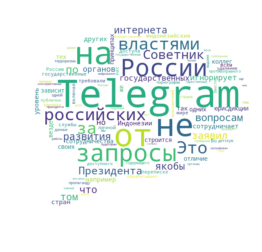

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = data['response']['items'][1]['text']

# картинка, в форме которой будет облако слов (это необязательно, по умолчанию — прямоугольник)
# важно: картинка для маски должна быть в jpeg
comment_mask = np.array(Image.open("comment.jpg"))

cloud = WordCloud(background_color="white", max_words=2000, mask=comment_mask)

# генерируем
cloud.generate(text)

# визуализируем
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

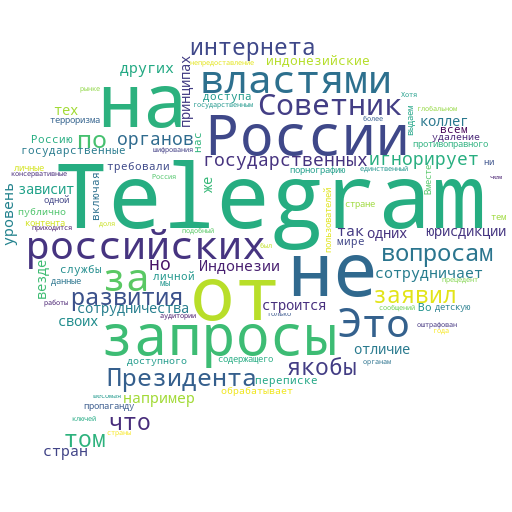

In [10]:
# реальный размер картинки
Image.open("post_cloud.png")